In [1]:
import pandas as pd
import numpy as np
import networkx as nx
from networkx.algorithms import bipartite as bip
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FixedFormatter, FixedLocator
import matplotlib.ticker as ptick
from pylab import *
from matplotlib import rc
# rc('text', usetex=True)

# フォント
plt.rcParams['font.family'] = 'Meiryo'
plt.rcParams['font.size'] = 15

# 描画のサイズ
plt.rcParams['figure.figsize'] = [10, 10]


In [2]:
year_start = 1981
year_end = 2010
year_range = 10


In [18]:
# 各期間データ
sep_year_reg_num_df_dict = {}

year_start = 1981
year_end = 2010
year_range = 10

for year in range(year_start, year_end+1, year_range):
    sep_year_reg_num_df_dict[f'{year}-{year+year_range-1}'] = pd.read_csv(f'../../Data/0_RegNum/app_{year}_{year+year_range-1}.csv', 
                                                                            encoding='utf-8', 
                                                                            sep=',', 
                                                                            dtype={'right_person_name':object, 
                                                                                    'ipc_class':object, 
                                                                                    'reg_num':np.float64})
    
    print(f'=============={year}-{year+year_range-1}==============')
    print('特許権者（次数削減後）:', sep_year_reg_num_df_dict[f'{year}-{year+year_range-1}']['right_person_name'].nunique())
    print('IPCクラス（次数削減後）:', sep_year_reg_num_df_dict[f'{year}-{year+year_range-1}']['ipc_class'].nunique())
    print('=====================================\n')


==============1981-1990==============
特許権者（次数削減後）: 22671
IPCクラス（次数削減後）: 613

==============1991-2000==============
特許権者（次数削減後）: 34375
IPCクラス（次数削減後）: 616

==============2001-2010==============
特許権者（次数削減後）: 37076
IPCクラス（次数削減後）: 617



==============1981-1990==============
70.724083874339
83.91842229194282
88.55985325646314
==============1991-2000==============
69.73113770482662
83.36369679110207
87.87598533432272
==============2001-2010==============
71.52785985504593
84.66128692627997
89.17999714710731


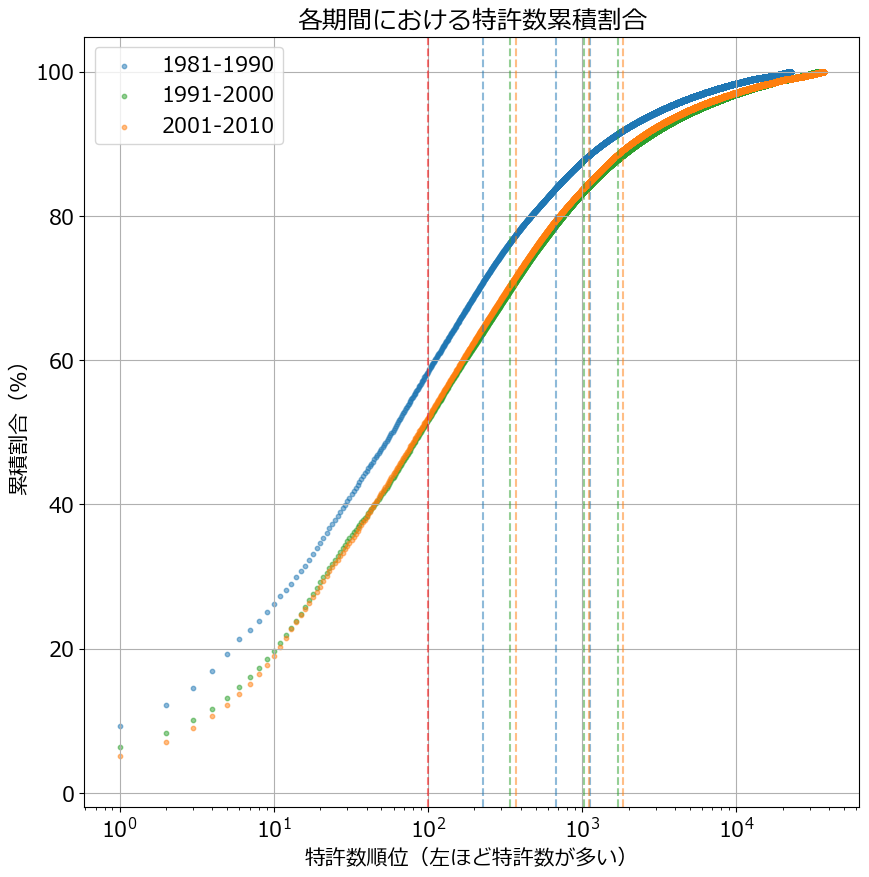

In [50]:
sep_year_reg_p_df_dict = {}
c_list = ['tab:blue', 'tab:green', 'tab:orange']
i = 0
for period, sep_year_reg_num_df in sep_year_reg_num_df_dict.items():
    sep_year_reg_p_df = sep_year_reg_num_df.groupby('right_person_name')[['reg_num']].sum()\
                                            .sort_values('reg_num', ascending=False)\
                                            .reset_index(drop=False).copy()
    sep_year_reg_p_df['p'] = sep_year_reg_p_df['reg_num'] / sep_year_reg_p_df['reg_num'].sum()
    # p_list = sep_year_reg_p_df['p'].tolist()
    # cumsum_p_list = np.cumsum(p_list)
    sep_year_reg_p_df['cumsum_p'] = np.cumsum(sep_year_reg_p_df['p'])*100
    plt.scatter(sep_year_reg_p_df.index, sep_year_reg_p_df['cumsum_p'], label=period, alpha=0.5, s=10, c=c_list[i])
    # plt.axvline(x=100, alpha=0.5, color='red', linestyle='--')
    # plt.axhline(y=sep_year_reg_p_df.loc[len(sep_year_reg_p_df)*1//100, 'cumsum_p'], 
    #             xmin=0,
    #             xmax=len(sep_year_reg_p_df)*1//100,
    #             alpha=0.5, linestyle='--', color=c_list[i])
    # plt.axhline(x=len(sep_year_reg_p_df)*3//100, alpha=0.5, linestyle='--', color=c_list[i])
    # plt.axhline(x=len(sep_year_reg_p_df)*5//100, alpha=0.5, linestyle='--', color=c_list[i])
    
    plt.axvline(x=len(sep_year_reg_p_df)*1//100, alpha=0.5, linestyle='--', color=c_list[i])
    plt.axvline(x=len(sep_year_reg_p_df)*3//100, alpha=0.5, linestyle='--', color=c_list[i])
    plt.axvline(x=len(sep_year_reg_p_df)*5//100, alpha=0.5, linestyle='--', color=c_list[i])
    plt.legend()
    plt.xscale('log')
    plt.title('各期間における特許数累積割合')
    plt.ylabel('累積割合（％）')
    plt.xlabel('特許数順位（左ほど特許数が多い）')
    plt.grid()
    i+=1
    print(f'=============={period}==============')
    print(sep_year_reg_p_df.loc[len(sep_year_reg_p_df)*1//100, 'cumsum_p'])
    print(sep_year_reg_p_df.loc[len(sep_year_reg_p_df)*3//100, 'cumsum_p'])
    print(sep_year_reg_p_df.loc[len(sep_year_reg_p_df)*5//100, 'cumsum_p'])
plt.axvline(x=100, alpha=0.5, color='red', linestyle='--')

    # plt.show()
    # display(sep_year_reg_p_df.head(len(sep_year_reg_p_df)*1//100))
    # print(p_list)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FixedFormatter, FixedLocator


In [14]:
sample_df = pd.read_csv('../data/processed/internal/technology/app_nendo_p_3.csv', encoding='utf-8', sep=',')
sample_df

,app_nendo_period,reg_num,right_person_name,ubiquity,tci,ki_1,ki_2,ki_3,ki_4,ki_5,...,ki_12,ki_13,ki_14,ki_15,ki_16,ki_17,ki_18,ki_19,ki_20,schmoch35
0,1981-1990,53259.147619,917,306,-1.355084,5.843137,305.400722,6.282707,314.223891,6.432818,...,326.062007,6.566634,326.679168,6.573238,327.036798,6.577053,327.243993,6.579256,327.363954,"Electrical machinery, apparatus, energy"
1,1981-2010,218724.090934,1449,356,-0.970810,6.469101,341.261601,7.050276,346.773033,7.197042,...,357.769719,7.309141,358.400879,7.314174,358.763813,7.316948,358.971261,7.318471,359.089307,"Electrical machinery, apparatus, energy"
2,1991-2000,64133.211966,1068,341,-0.991478,6.143695,327.815402,6.577498,330.650150,6.670471,...,338.989810,6.735493,339.555947,6.738721,339.891759,6.740549,340.089145,6.741579,340.204428,"Electrical machinery, apparatus, energy"
3,2001-2010,101331.731349,1221,350,-0.801859,6.328571,330.898613,6.905649,331.163891,7.032132,...,335.546735,7.106074,335.835149,7.108788,336.000108,7.110232,336.092828,7.110997,336.144263,"Electrical machinery, apparatus, energy"
4,1981-1990,52583.580952,676,169,-2.367955,5.934911,251.079599,6.276132,288.586243,6.407457,...,324.312360,6.558937,325.755497,6.568408,326.543177,6.574086,326.977096,6.577461,327.218091,Audio-visual technology
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,2001-2010,17092.000000,704,260,0.179573,6.276923,317.767293,6.768001,331.478583,6.977998,...,336.266568,7.108308,336.253467,7.110372,336.236525,7.111230,336.224047,7.111590,336.216215,Other consumer goods
136,1981-1990,27729.361550,785,379,0.077505,5.635884,364.648237,6.280947,345.622635,6.469982,...,328.288589,6.578337,327.871000,6.580490,327.682640,6.581457,327.597739,6.581894,327.559514,Civil engineering
137,1981-2010,112115.190004,1234,412,0.459171,5.684466,388.933186,6.720864,372.758135,7.073575,...,360.099325,7.311478,359.698788,7.316553,359.487666,7.318760,359.375222,7.319703,359.314884,Civil engineering
138,1991-2000,46221.954418,987,414,0.380539,5.555556,375.516729,6.325106,356.227529,6.579713,...,341.294542,6.738051,340.846511,6.740956,340.617188,6.742162,340.498232,6.742650,340.435782,Civil engineering


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FixedFormatter, FixedLocator

# plt.rcParams['font.family'] = 'Meiryo'
# plt.rcParams['font.size'] = 15
# plt.rcParams['axes.spines.top'] = False
# plt.rcParams['axes.spines.bottom'] = False
# plt.rcParams['axes.spines.left'] = False
# plt.rcParams['axes.spines.right'] = False

# plt.rcParams['axes.grid'] = True
# plt.rcParams['axes.grid.axis'] = 'both'
# plt.rcParams['axes.grid.which'] = 'major'
# plt.rcParams['grid.alpha'] = 1.0
# plt.rcParams['grid.color'] = 'gray' # '#b0b0b0'
# plt.rcParams['grid.linestyle'] = '--'
# plt.rcParams['grid.linewidth'] = 0.8

global original_colors_list, lighter_colors_list, darker_colors_list, name_conv_dict, tech_colors_dict

original_colors_list = [
    '#ff0000',
    '#ff5000',
    '#ffa100',
    '#fff100',
    '#bbff00',
    '#6bff00',
    '#1aff00',
    '#00ff35',
    '#00ff86',
    '#00ffd6',
    '#00d6ff',
    '#0086ff',
    '#0035ff',
    '#1a00ff',
    '#6b00ff',
    '#bb00ff',
    '#ff00f1',
    '#ff00a1',
    '#ff0050',
    '#ff0000',
]
lighter_colors_list = [
    '#ff0000',
    '#ff5000',
    '#ffa100',
    '#fff100',
    '#bbff00',
    '#6bff00',
    '#1aff00',
    '#00ff35',
    '#00ff85',
    '#00ffd6',
    '#00d5ff',
    '#0085ff',
    '#0035ff',
    '#1900ff',
    '#6b00ff',
    '#bb00ff',
    '#ff00f1',
    '#ff00a0',
    '#ff0050',
    '#ff0000',
]
darker_colors_list = [
    '#7f0000',
    '#7f2800',
    '#7f5000',
    '#7f7800',
    '#5d7f00',
    '#357f00',
    '#0d7f00',
    '#007f1a',
    '#007f42',
    '#007f6b',
    '#006a7f',
    '#00427f',
    '#001a7f',
    '#0c007f',
    '#35007f',
    '#5d007f',
    '#7f0078',
    '#7f0050',
    '#7f0028',
    '#7f0000',
]
# 左側の軸
name_conv_dict = {
    'ＪＦＥエンジニアリング株式会社': 'JFEエンジニアリング株式会社',
    'ＭｅｉｊｉＳｅｉｋａフアルマ株式会社': 'MeijiSeikaファルマ株式会社',
    'キツコーマン株式会社': 'キッコーマン株式会社',
    'キツセイ薬品工業株式会社': 'キッセイ薬品株式会社',
    'キヤノン株式会社': 'キヤノン株式会社',
    'コニカミノルタ株式会社': 'コニカミノルタ株式会社',
    'シヤープ株式会社': 'シャープ株式会社',
    'セイコーエプソン株式会社': 'セイコーエプソン株式会社',
    'ソニーグループ株式会社': 'ソニーグループ株式会社',
    'ソニー株式会社': 'ソニー株式会社',
    'ダイスタージヤパン株式会社': 'ダイスタージャパン株式会社',
    'トヨタ自動車株式会社': 'トヨタ自動車株式会社',
    'パナソニツクホールデイングス株式会社': 'パナソニックホールディングス株式会社',
    'パナソニツク株式会社': 'パナソニック株式会社',
    'メルシヤン株式会社': 'メルシャン株式会社',
    'ルネサスエレクトロニクス株式会社': 'ルネサンスエレクトロニクス株式会社',
    '旭化成株式会社': '旭化成株式会社',
    '一丸フアルコス株式会社': '一丸ファルコス株式会社',
    '株式会社ＩＨＩ': '株式会社IHI',
    '株式会社デンソー': '株式会社デンソー',
    '株式会社ノエビア': '株式会社ノエビア',
    '株式会社フアンケル': '株式会社ファンケル',
    '株式会社リコー': '株式会社リコー',
    '株式会社三井Ｅ＆Ｓホールデイングス': '株式会社三井E&Sホールディングス',
    '株式会社神戸製鋼所': '株式会社神戸製鋼所',
    '株式会社東芝': '株式会社東芝',
    '株式会社日立製作所': '株式会社日立製作所',
    '株式会社豊田中央研究所': '株式会社豊田中央研究所',
    '株式会社明治': '株式会社明治',
    '株式会社林原': '株式会社林原',
    '丸善製薬株式会社': '丸善製薬株式会社',
    '協和キリン株式会社': '協和キリン株式会社',
    '高砂香料工業株式会社': '高砂香料工業株式会社',
    '国立研究開発法人産業技術総合研究所': '国立研究開発法人産業技術総合研究所',
    '国立大学法人東京工業大学': '国立大学法人東京工業大学',
    '国立大学法人東京大学': '国立大学法人東京大学',
    '財団法人微生物化学研究会': '財団法人微生物化学研究会',
    '三井化学アグロ株式会社': '三井化学アグロ株式会社',
    '三栄源エフ・エフ・アイ株式会社': '三栄源エフ・エフ・アイ株式会社',
    '三共株式会社': '三井株式会社',
    '三省製薬株式会社': '三省製薬株式会社',
    '三菱ケミカル株式会社': '三菱ケミカル株式会社',
    '三菱重工業株式会社': '三菱重工業株式会社',
    '三菱商事ライフサイエンス株式会社': '三菱商事ライフサイエンス株式会社',
    '三菱電機株式会社': '三菱電機株式会社',
    '三洋電機株式会社': '三洋電機株式会社',
    '住友フアーマ株式会社': '住友ファーマ株式会社',
    '住友重機械工業株式会社': '住友重機械工業株式会社',
    '小川香料株式会社': '小川香料株式会社',
    '松谷化学工業株式会社': '松谷化学工業株式会社',
    '森永乳業株式会社': '森永乳業株式会社',
    '雪印メグミルク株式会社': '雪印メグミルク株式会社',
    '川崎重工業株式会社': '川崎重工業株式会社',
    '太陽化学株式会社': '太陽化学株式会社',
    '大阪瓦斯株式会社': '大阪瓦斯株式会社',
    '大塚製薬株式会社': '大塚製薬株式会社',
    '大鵬薬品工業株式会社': '大鵬薬品工業株式会社',
    '中外製薬株式会社': '中外製薬株式会社',
    '中国電力株式会社': '中国電力株式会社',
    '長谷川香料株式会社': '長谷川香料株式会社',
    '天野エンザイム株式会社': '天野エンザイム株式会社',
    '田辺三菱製薬株式会社': '田辺三菱製薬株式会社',
    '独立行政法人産業技術総合研究所': '独立行政法人産業技術総合研究所',
    '日産自動車株式会社': '日立自動車株式会社',
    '日清オイリオグループ株式会社': '日清オイリオグループ株式会社',
    '日本ケミフア株式会社': '日本ケミファ株式会社',
    '日本新薬株式会社': '日本新薬株式会社',
    '日本水産株式会社': '日本水産株式会社',
    '日本製鉄株式会社': '日本製鉄株式会社',
    '日本電気株式会社': '日本電気株式会社',
    '日本電信電話株式会社': '日本電信電話株式会社',
    '日立造船株式会社': '日立造船株式会社',
    '不二製油グループ本社株式会社': '不二製油グループ本社株式会社',
    '不二製油株式会社': '不二製油株式会社',
    '富士通株式会社': '富士通株式会社',
    '富士電機株式会社': '富士電機株式会社',
    '本田技研工業株式会社': '本田技研工業株式会社',
    '味の素株式会社': '味の素株式会社',
    '理研ビタミン株式会社': '理研ビタミン株式会社'
}

tech_colors_dict = {
    'Digital communication': ['Electrical engineering', '#6bff00'],
    'Telecommunications': ['Electrical engineering', '#6bff00'],
    'Computer technology': ['Electrical engineering', '#6bff00'],
    'Audio-visual technology': ['Electrical engineering', '#6bff00'],
    'IT methods for management': ['Electrical engineering', '#6bff00'],
    'Pharmaceuticals': ['Chemistry', '#ff0000'],
    'Organic fine chemistry': ['Chemistry', '#ff0000'],
    'Basic communication processes': ['Electrical engineering', '#6bff00'],
    'Optics': ['Instruments', '#00ffd6'],
    'Semiconductors': ['Electrical engineering', '#6bff00'],
    'Biotechnology': ['Instruments', '#00ffd6'],
    'Medical technology': ['Electrical engineering', '#6bff00'],
    'Micro-structural and nano-technology': ['Chemistry', '#ff0000'],
    'Measurement': ['Instruments', '#00ffd6'],
    'Food chemistry': ['Chemistry', '#ff0000'],
    'Control': ['Instruments', '#00ffd6'],
    'Furniture, games': ['Other fields', '#ff0050'],
    'Basic materials chemistry': ['Chemistry', '#ff0000'],
    'Chemical engineering': ['Chemistry', '#ff0000'],
    'Environmental technology': ['Chemistry', '#ff0000'],
    'Macromolecular chemistry, polymers': ['Chemistry', '#ff0000'],
    'Engines, pumps, turbines': ['Mechanical engineering', '#bb00ff'],
    'Electrical machinery, apparatus, energy': ['Electrical engineering',
    '#6bff00'],
    'Textile and paper machines': ['Mechanical engineering', '#bb00ff'],
    'Other consumer goods': ['Other fields', '#ff0050'],
    'Civil engineering': ['Other fields', '#ff0050'],
    'Materials, metallurgy': ['Chemistry', '#ff0000'],
    'Other special machines': ['Mechanical engineering', '#bb00ff'],
    'Thermal processes and apparatus': ['Mechanical engineering', '#bb00ff'],
    'Surface technology, coating': ['Chemistry', '#ff0000'],
    'Transport': ['Mechanical engineering', '#bb00ff'],
    'Handling': ['Mechanical engineering', '#bb00ff'],
    'Mechanical elements': ['Mechanical engineering', '#bb00ff']
    }

def rank_doubleaxis(
                    df_dict: dict,
                    rank_num: int = 15,
                    member_col: str = 'right_person_name',
                    value_col: str = 'reg_num',
                    prop_dict: dict = {
                                        'figsize': (16, 10),
                                        'xlabel': 'Segment',
                                        'ylabel': 'y軸のラベル',
                                        'title': 'タイトル',
                                        'fontsize': 15,
                                        'year_range': 15,
                                        'ascending': False,
                                        'color': 'default',
                                        },
                    ):
    '''
    Args:
        df_dict: dict
            key: str, 区間名
            value: pd.DataFrame, データ
        rank_num: int, 上位何人を表示するか
        member_col: str, ランク付けする対象の列名
        value_col: str, ランク付けの基準となる列名
        prop_dict: dict
            figsize: tuple, 描画サイズ
            xlabel: str, 'Segment'
            ylabel: str, 'y軸のラベル'
            title: str, 'タイトル'
            fontsize: int, 15
            year_range: int, 15
            ascending: bool, False
            color: str, 'default'
    
    '''
    plt.rcParams['font.size'] = prop_dict['fontsize']
    plt.rcParams['font.family'] = 'Meiryo'
    
    rank_dfs_dict = df_dict.copy()
    segments_list = list(rank_dfs_dict.keys())

    for period, rank_df in rank_dfs_dict.items():
        rank_df = rank_df[[member_col, value_col]].copy()
        rank_df['rank'] = rank_df[value_col].rank(method='first', ascending=prop_dict['ascending']).astype(np.int64)
        rank_df['segment'] = period
        # try: rank_df['segment'] = int(period[:4])
        # except ValueError: rank_df['segment'] = period
        rank_df = rank_df.sort_values(by=['rank'], ascending=True)
        rank_dfs_dict[period] = rank_df[[member_col, 'rank', 'segment']].copy()
    rank_df = pd.concat(list(rank_dfs_dict.values()), ignore_index=True, axis='index')
    rank_df['segment'] = pd.Categorical(rank_df['segment'], categories=segments_list, ordered=True)
    
    # 左軸の上位
    first_top_sources = rank_df[(rank_df['segment'] == segments_list[0]) & (rank_df['rank'] <= rank_num)]
    # 右軸の上位
    last_top_sources = rank_df[(rank_df['segment'] == segments_list[-1]) & (rank_df['rank'] <= rank_num)]

    hr_list = rank_df[rank_df['rank'] <= rank_num][member_col].unique().tolist()

    color_list = (lighter_colors_list + original_colors_list + darker_colors_list) * (
        len(hr_list) // 60 + 1
    )

    hr_color_dict = {hr: 'gray' for hr in rank_df[member_col].unique().tolist()}
    for i, hr in enumerate(hr_list):
        hr_color_dict[hr] = color_list[i]
    if prop_dict['color'] == 'default':
        for i, hr in enumerate(hr_list):
            hr_color_dict[hr] = color_list[i]
    else:
        for k, v in prop_dict['color'].items():
            hr_color_dict[k] = v
    hr_color_dict = {**hr_color_dict, **tech_colors_dict}
    # hr_color_dict = dict(zip(hr_list, color_list[:len(hr_list)]))
    # キャンバスの生成
    fig, ax = plt.subplots(
        figsize=prop_dict['figsize'], subplot_kw=dict(ylim=(0.5, 0.5 + rank_num))
    )

    
    ax.xaxis.set_major_locator(MultipleLocator(1))
    ax.yaxis.set_major_locator(FixedLocator(first_top_sources['rank'].to_list()))
    
    # ax.yaxis.set_major_formatter(
    #     FixedFormatter(
    #         [name_conv_dict[name] for name in first_top_sources[member_col].to_list()]
    #     )
    # )
    ax.yaxis.set_major_formatter(
        FixedFormatter(
            [f"$\color{{{hr_color_dict[name][1]}}}{{{name[0]}}}$"
    for name in first_top_sources[member_col]]
        )
    )

    # 右側の軸
    yax2 = ax.secondary_yaxis('right')
    yax2.yaxis.set_major_locator(FixedLocator(last_top_sources['rank'].to_list()))
    # yax2.yaxis.set_major_formatter(
    #     FixedFormatter(
    #         [name_conv_dict[name] for name in last_top_sources[member_col].to_list()]
    #     )
    # )
    yax2.yaxis.set_major_formatter(
        FixedFormatter(
            ["$\color{"+f'{{hr_color_dict[name][1]}}'+"}{"+f"{{name[0]}}"+"}$"
    for name in last_top_sources[member_col]]
        )
    )

    i = 0
    for member, rank in rank_df[rank_df['rank'] <= 10000].groupby(member_col):
        ax.plot(
            'segment',
            'rank',
            'o-',
            data=rank,
            linewidth=7,
            markersize=10,
            # color=hr_color_dict[member],
            color=hr_color_dict[member],
            alpha=0.6, 
            label=member
        )

    # 降順で描画しようね
    ax.invert_yaxis()

    # 軸ラベルとタイトル
    ax.set(
        xlabel='\n' + prop_dict['xlabel'],
        ylabel=prop_dict['ylabel'] + '\n',
        title=prop_dict['title'],
    )

    # 補助線
    ax.grid(axis='both', linestyle='--', c='lightgray')

    # 枠線消えちゃえ
    [s.set_visible(False) for s in ax.spines.values()]
    [s.set_visible(False) for s in yax2.spines.values()]

    # x軸の目盛り
    plt.xticks(
        range(
            0,
            len(segments_list) + 1,
            1,
            # prop_dict['year_range'],
        ),
        segments_list,
        rotation=90
    )

    # 収まるように描画しようね
    fig.tight_layout()

    return rank_df


# if __name__ == '__main__':
#     rank()
#     network()


In [25]:
sample_df

,app_nendo_period,reg_num,right_person_name,ubiquity,tci,ki_1,ki_2,ki_3,ki_4,ki_5,...,ki_12,ki_13,ki_14,ki_15,ki_16,ki_17,ki_18,ki_19,ki_20,schmoch35
0,1981-1990,53259.147619,917,306,-1.355084,5.843137,305.400722,6.282707,314.223891,6.432818,...,326.062007,6.566634,326.679168,6.573238,327.036798,6.577053,327.243993,6.579256,327.363954,"Electrical machinery, apparatus, energy"
1,1981-2010,218724.090934,1449,356,-0.970810,6.469101,341.261601,7.050276,346.773033,7.197042,...,357.769719,7.309141,358.400879,7.314174,358.763813,7.316948,358.971261,7.318471,359.089307,"Electrical machinery, apparatus, energy"
2,1991-2000,64133.211966,1068,341,-0.991478,6.143695,327.815402,6.577498,330.650150,6.670471,...,338.989810,6.735493,339.555947,6.738721,339.891759,6.740549,340.089145,6.741579,340.204428,"Electrical machinery, apparatus, energy"
3,2001-2010,101331.731349,1221,350,-0.801859,6.328571,330.898613,6.905649,331.163891,7.032132,...,335.546735,7.106074,335.835149,7.108788,336.000108,7.110232,336.092828,7.110997,336.144263,"Electrical machinery, apparatus, energy"
4,1981-1990,52583.580952,676,169,-2.367955,5.934911,251.079599,6.276132,288.586243,6.407457,...,324.312360,6.558937,325.755497,6.568408,326.543177,6.574086,326.977096,6.577461,327.218091,Audio-visual technology
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,2001-2010,17092.000000,704,260,0.179573,6.276923,317.767293,6.768001,331.478583,6.977998,...,336.266568,7.108308,336.253467,7.110372,336.236525,7.111230,336.224047,7.111590,336.216215,Other consumer goods
136,1981-1990,27729.361550,785,379,0.077505,5.635884,364.648237,6.280947,345.622635,6.469982,...,328.288589,6.578337,327.871000,6.580490,327.682640,6.581457,327.597739,6.581894,327.559514,Civil engineering
137,1981-2010,112115.190004,1234,412,0.459171,5.684466,388.933186,6.720864,372.758135,7.073575,...,360.099325,7.311478,359.698788,7.316553,359.487666,7.318760,359.375222,7.319703,359.314884,Civil engineering
138,1991-2000,46221.954418,987,414,0.380539,5.555556,375.516729,6.325106,356.227529,6.579713,...,341.294542,6.738051,340.846511,6.740956,340.617188,6.742162,340.498232,6.742650,340.435782,Civil engineering


In [26]:
div_df_dict = {}
for year in range(1981, 2010 + 1, 10):
    period = f"{year}-{year+10-1}"
    div_df_dict[period] = sample_df[
        sample_df["app_nendo_period"] == period
    ].copy()
div_df_dict

{'1981-1990':     app_nendo_period       reg_num  right_person_name  ubiquity       tci  \
 0          1981-1990  53259.147619                917       306 -1.355084   
 4          1981-1990  52583.580952                676       169 -2.367955   
 8          1981-1990  24203.536905                430       146 -3.019720   
 12         1981-1990   4189.386905                189       101 -3.304384   
 16         1981-1990  12301.666667                331       158 -3.064516   
 20         1981-1990  34559.633333                500       146 -2.882514   
 24         1981-1990    238.833333                 45        35 -2.485138   
 28         1981-1990  32872.666667                483       150 -1.343240   
 32         1981-1990  53808.588462                610       155 -0.814576   
 36         1981-1990  43956.486905               1106       429 -0.802990   
 40         1981-1990   2179.666667                322       234  1.502922   
 44         1981-1990  13770.650000                

In [27]:
# sample_melt_df = sample_df.melt(id_vars=['schmoch35'], value_vars=["reg_num", "reg_num_eu"]).sort_values(
#         ["variable", "value"], ascending=[False, False])
# sample_df_dict = {
#     "0": sample_melt_df[sample_melt_df['variable']=='reg_num_jp'], 
#     "1": sample_melt_df[sample_melt_df['variable']=='reg_num_eu'],
# }



fs = (30, 30)

sample = rank_doubleaxis(
    div_df_dict,
    rank_num=33,
    member_col='schmoch35',
    value_col="tci",
    prop_dict={
        "figsize": fs,
        "xlabel": "",
        "ylabel": "",
        "title": "",
        "fontsize": 40,
        "year_range": 1,
        "ascending": False,
        # 'color': color_dict
        "color": "default",
    },
)
# plt.title("Japan vs EU patent", fontsize=40)
# plt.xticks(range(0, 2), ['Japan', 'EU'], rotation=90)

ValueError: ['Electrical engineering', '#6bff00'] is not a valid value for color

Error in callback <function _draw_all_if_interactive at 0x00000182FD774FE0> (for post_execute):


ValueError: 
\color{#ff0000}{P}
^
ParseFatalException: Unknown symbol: \color, found '\'  (at char 0), (line:1, col:1)

ValueError: 
\color{#ff0000}{P}
^
ParseFatalException: Unknown symbol: \color, found '\'  (at char 0), (line:1, col:1)

<Figure size 3000x3000 with 1 Axes>